This example investigates the effect of flight altitudes for a drone investigation.

In [1]:
import numpy as np
from saem import CSEMData

In [2]:
fMin, fMax = 32, 25000
f = np.round(2**np.arange(0, np.log2(fMax/fMin), 0.5) * fMin)
f = np.hstack((f[3], f[5:-3], f[-2:]))
print(f)

[   91.   181.   256.   362.   512.   724.  1024.  1448.  2048.  2896.
  4096.  5793.  8192. 16384. 23170.]


CSEM data with 20 stations and 15 frequencies
Transmitter length 500m
Median Rx distance 50.0m
Sounding pos at 25.000000,0.000000,10.000000,


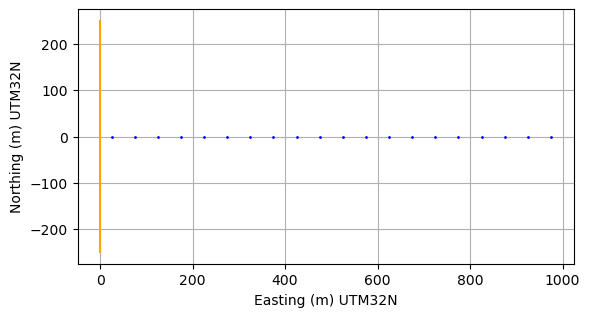

In [3]:
x = np.arange(25, 1000, 50)  # receiver positions
txLen = 500  # length of the transmitter
csem10 = CSEMData(f=f, rx=x, rz=10, tx=[0, 0], ty=[-txLen/2, txLen/2])
csem10.cmp = [1, 0, 1]
print(csem10)
ax = csem10.showPos()

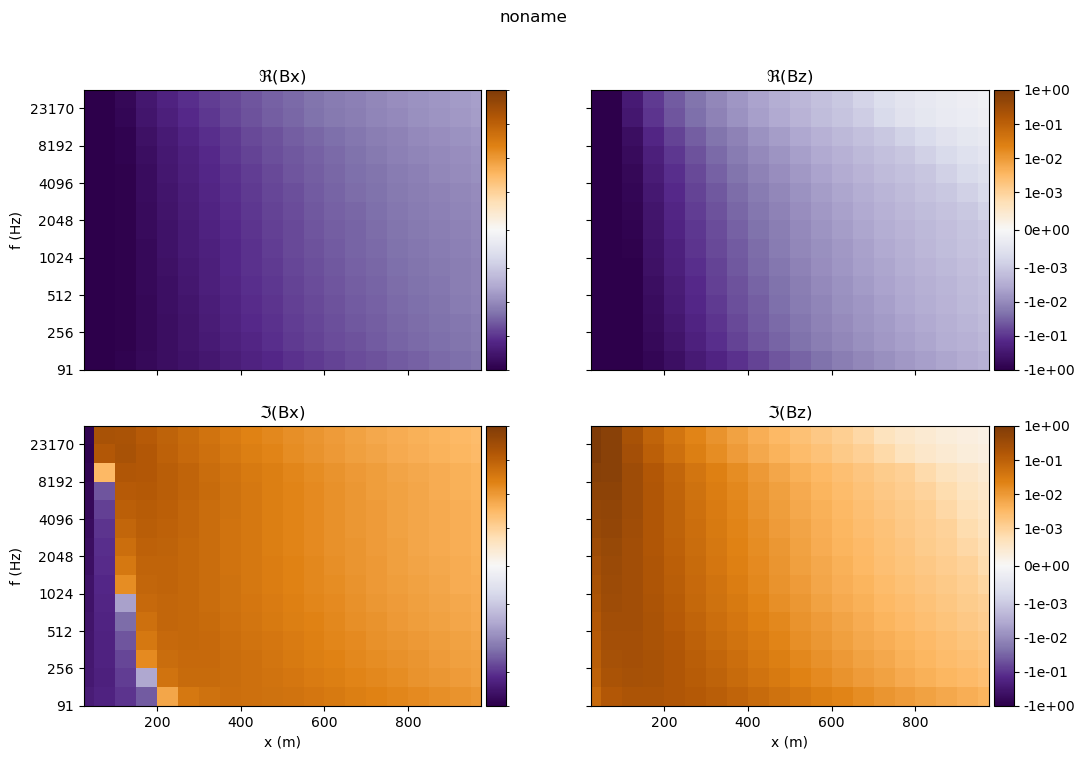

In [4]:
model = dict(rho=[300, 20, 300, 5], thk=[20, 10, 20])
csem10.simulate(**model)
csem10.DATA = csem10.RESP
csem10.showLineData();

In [5]:
csem40 = CSEMData(f=f, rx=x, tx=[0, 0], ty=[-txLen/2, txLen/2], rz=40)
csem40.cmp = [1, 0, 1]
csem40.simulate(**model)
csem40.DATA = csem40.RESP

closest point at distance is  0.0
Tx distance  525.0
closest point at distance is  0.0
Tx distance  525.0


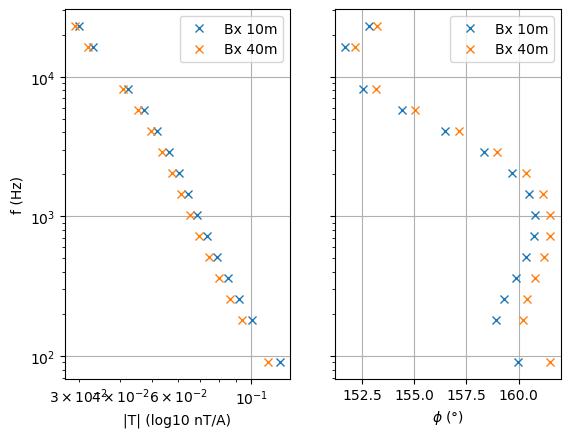

In [8]:
pos = [525, 0]
ax = csem10.showSounding(position=pos, color="C0", cmp=[1, 0, 0], label="Bx 10m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[1, 0, 0], label="Bx 40m");

closest point at distance is  0.0
Tx distance  525.0
closest point at distance is  0.0
Tx distance  525.0


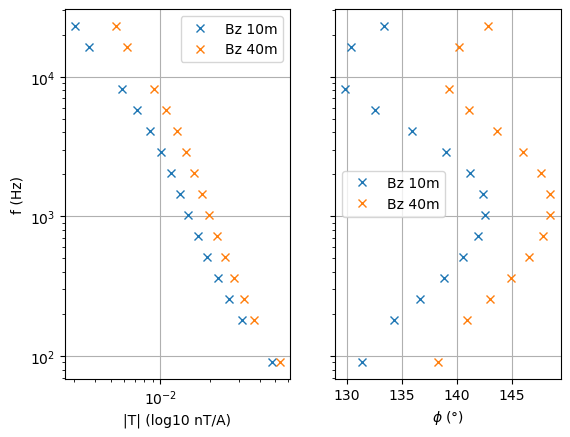

In [9]:
pos = [525, 0]
ax = csem10.showSounding(position=pos, color="C0", cmp=[0, 0, 1], label="Bz 10m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[0, 0, 1], label="Bz 40m");

In [25]:
csem10.createDepthVector()
csem10.depth *= 0.5
csem40.createDepthVector()
csem40.depth *= 0.5

AttributeError: 'Line2D' object has no property 'amphi'

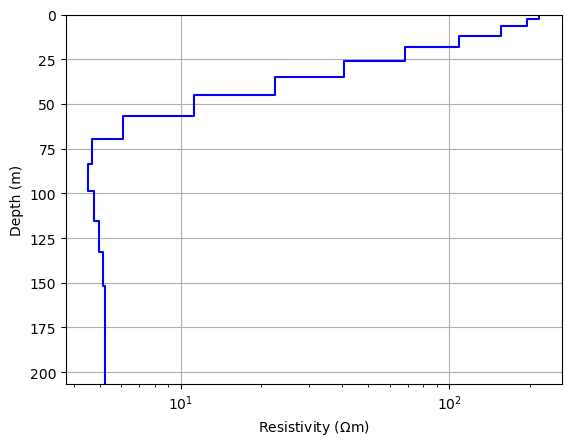

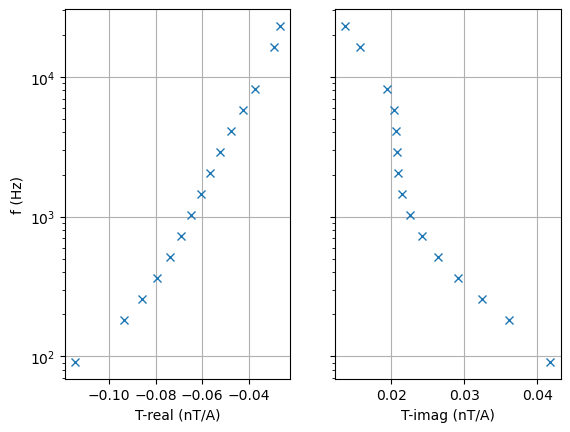

In [28]:
model10 = csem10.invertSounding(show=True)

In [30]:
csem10.inv1d.chi2History

[0.24470197041159128, 0.1510601673350978]

In [26]:
model40 = csem40.invertSounding(show=False)
np.column_stack([model10, model40])

array([[242.4309013 , 240.82483121],
       [211.04760323, 210.2219947 ],
       [157.55943953, 157.67693684],
       [102.80725129, 103.4232665 ],
       [ 61.13874645,  61.75086404],
       [ 34.59227489,  35.0040028 ],
       [ 19.70544403,  19.81102659],
       [ 11.05007206,  10.97466414],
       [  6.25211946,   6.22277398],
       [  4.74645008,   4.75559533],
       [  4.36859908,   4.40629398],
       [  4.35777166,   4.41471481],
       [  4.4579987 ,   4.52675274],
       [  4.57407316,   4.64677415],
       [  4.67062824,   4.74159689],
       [  4.73845779,   4.80531925]])

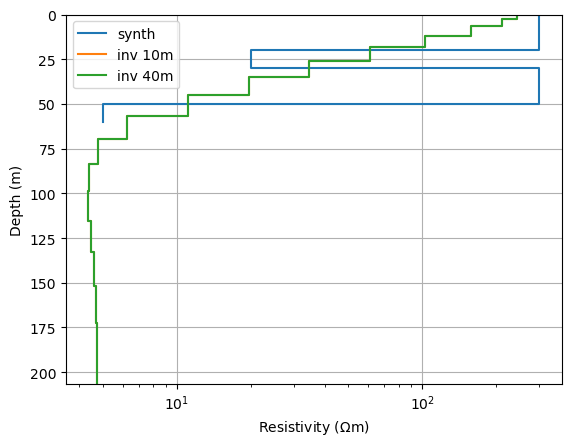

In [27]:
import matplotlib.pyplot as plt
from pygimli.viewer.mpl import drawModel1D
fig, ax = plt.subplots()
drawModel1D(ax, model["thk"], model["rho"], color="C0", plot='semilogx', label="synth")
drawModel1D(ax, np.diff(csem10.depth), csem10.model, color="C1", plot='semilogx', label="inv 10m")
drawModel1D(ax, np.diff(csem10.depth), csem10.model, color="C2", plot='semilogx', label="inv 40m")
ax.legend()